<a href="https://colab.research.google.com/github/NylRJ/colab-IA/blob/main/Q_Learning_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Aprendizagem por reforço com Q-Learning**

Entendimento do ambiente 

In [ ]:
import gym
import random


In [ ]:
env = gym.make('Taxi-v3').env

In [ ]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



###**# 0 = south 1 = north 2 = east 3 = west 4 = Pegar Passageiro 5 = Deixar passageiro**

In [ ]:
print(env.action_space)

Discrete(6)


###**Calculando os estado desponiveis**###
#5x5x5x4

In [ ]:
5*5*5*4

500

####**4 destinos**####

In [ ]:
print(env.observation_space)

Discrete(500)


In [ ]:
len(env.P)

500

In [ ]:
env.P[484]

{0: [(1.0, 484, -1, False)],
 1: [(1.0, 384, -1, False)],
 2: [(1.0, 484, -1, False)],
 3: [(1.0, 464, -1, False)],
 4: [(1.0, 484, -10, False)],
 5: [(1.0, 484, -10, False)]}

###**Treinamento**

# **Diferença Temporal**
Diferença temporal (Q-learning)

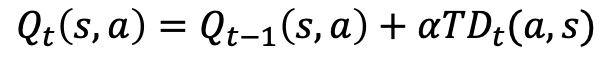

In [ ]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table.shape

(500, 6)

#1-10% 3-90%
### exploration / exploitation

In [ ]:
%%time
from IPython.display import clear_output
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# estado inicial
for i in  range(100000):
  estado  = env.reset()

  penalidades, recompensa = 0, 0
  done  = False
  while not done:
    # Exploração
    if random.uniform(0, 1) < epsilon:
      acao = env.action_space.sample()
    # Exploitation
    else:
      acao = np.argmax(q_table[estado])
    proximo_estado, recompensa, done, info = env.step(acao)

    q_antigo = q_table[estado, acao]
    proximo_maximo_valor = np.max(q_table[proximo_estado])

     # pode ficar um pouco grande o q_antigo e explodir a memoria no colab
     # q_novo = q_antigo + alpha * (recompensa + gamma * proximo_maximo_valor)

    # aqui estou normalizando para que ele fique em uma escala menor para evitar gera erro
    q_novo = ( 1- alpha) * q_antigo + alpha * (recompensa + gamma * proximo_maximo_valor)
    q_table[estado, acao] = q_novo

    if recompensa == -10:
      penalidades += 1 
    
    estado =  proximo_estado

  if i %  100 == 0:
    clear_output(wait=True)
    print('Episodio: ', i) 

print('Treinamento concluído')


Episodio:  99900
Treinamento concluído
CPU times: user 1min 6s, sys: 13.2 s, total: 1min 20s
Wall time: 1min 8s


   0          1          2               3

n =cima s=baixo o=esquerda l=direita

In [ ]:
# 0 = south 1 = north 2 = east 3 = west 4 = pickup 5 = dropoff
q_table[374]

array([ -2.27325184,  -2.41837057,  -2.41837057,  -2.3639511 ,
       -11.36394838, -11.3639508 ])

In [ ]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.encode(3, 3, 3, 2)

374

### **Avaliação**

In [ ]:
total_penalidades = 0
episodios = 50
frames = []

for _ in range(episodios):
  estado = env.reset()
  penalidades, recompensa = 0, 0
  done = False
  while not done:
    acao = np.argmax(q_table[estado])
    estado, recompensa, done, info = env.step(acao)

    if recompensa == -10:
      penalidades += 1
    
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': estado,
        'action': acao,
        'reward': recompensa
    })
  total_penalidades += penalidades
print('Episódio', episodios)
print('Penalidades', total_penalidades)

Episódio 50
Penalidades 0


In [ ]:
frames[0]

{'action': 2,
 'frame': '+---------+\n|R: | : :G|\n| : | : : |\n| : :\x1b \x1b: : |\n| | : | : |\n|\x1bY\x1b| : |\x1bB\x1b: |\n+---------+\n  (East)\n',
 'reward': -1,
 'state': 254}

In [ ]:
from time import sleep
for frame in frames:
  clear_output(wait=True)
  print(frame['frame'])
  print('Estado', frame['state'])
  print('Ação', frame['action'])
  print('Recompensa', frame['reward'])
  sleep(0.5)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Estado 0
Ação 5
Recompensa 20
